# Vector and Its Definition

```{contents}
:local:
```

In [1]:
%config InlineBackend.figure_format = 'svg'

from __future__ import annotations

import math
import sys
from pathlib import Path
from typing import Optional, Sequence, TypeVar

import matplotlib.pyplot as plt
import numpy as np
import rich
from IPython.display import display

def find_root_dir(current_path: Path | None = None, marker: str = '.git') -> Path | None:
    """
    Find the root directory by searching for a directory or file that serves as a
    marker.

    Parameters
    ----------
    current_path : Path | None
        The starting path to search from. If None, the current working directory
        `Path.cwd()` is used.
    marker : str
        The name of the file or directory that signifies the root.

    Returns
    -------
    Path | None
        The path to the root directory. Returns None if the marker is not found.
    """
    if not current_path:
        current_path = Path.cwd()
    current_path = current_path.resolve()
    for parent in [current_path, *current_path.parents]:
        if (parent / marker).exists():
            return parent
    return None

root_dir = find_root_dir(marker='omnivault')

if root_dir is not None:
    sys.path.append(str(root_dir))
    from omnivault.utils.visualization.style import use_svg_display
    from omnivault.linear_algebra.plotter import (
        VectorPlotter2D,
        VectorPlotter3D,
        add_vectors_to_plotter,
        add_text_annotations,
    )
    from omnivault.linear_algebra.vector import Vector2D, Vector3D
else:
    raise ImportError("Root directory not found.")

use_svg_display()

## Learning Objectives

1. **Understand _Geometric Definition_ of Vectors**: Comprehend vectors as
   entities with both **magnitude** and **direction**.

2. **Differentiate _Vectors_ and _Coordinates_**: Identify the distinction
   between a vector and its spatial coordinates.

3. **Learn _Vector Invariance_ Under Coordinate Transformation**: Recognize a
   vector's unchanging properties under different coordinate systems.

4. **Explore _Algebraic Definition_ of Vectors**: Understand vectors as ordered
   tuples in $D$-dimensional space over field $\mathbb{F}$.

5. **Comprehend _Vector Orientation_**: Recognize column and row vectors as
   specific matrix forms.

6. **Grasp _Equality of Vectors_**: Understand geometric and algebraic
   perspectives of vector equality.

7. **Learn About _Transpose of Vectors_**: Understand the operation and effects
   of vector transposition.

8. **Familiarize with _Properties of Transpose_**: Learn key properties like
   double transpose and transpose operations on vector sums and scalar
   multiplications.

## Definition

### Geometric Definition

```{prf:definition} Geometric Definition of a Vector
:label: 01-vector-definition-geometric-definition

A **vector** is a mathematical object that possesses both **magnitude** and
**direction**. Geometrically, it is represented as a directed line segment,
where the length of the line indicates its magnitude and its orientation in
space signifies its direction.
```

```{prf:example} Vector versus Coordinate
:label: 01-vector-definition-vector-versus-coordinate

A key distinction in linear algebra is between a **vector** and a **coordinate
in space**:

The three coordinates (tail of the line segment) in
{numref}`01-vector-definition-vector-versus-coordinate` are distinct, the three
vectors (lines) are equivalent. This equivalence is because each vector
represents a movement of 1 unit to the right and 2 units down in a
two-dimensional space, denoted conventionally as a vector $\mathbf{v} = [1, -2]$
(bolded or $\vec{v}$). When positioned at the origin, the head of this vector
aligns with the coordinate point $(1, -2)$. The takeaway is that all 3 vectors
have the same magnitude and direction and can be represented by the vector
$\mathbf{v} = [1, -2]$.
```

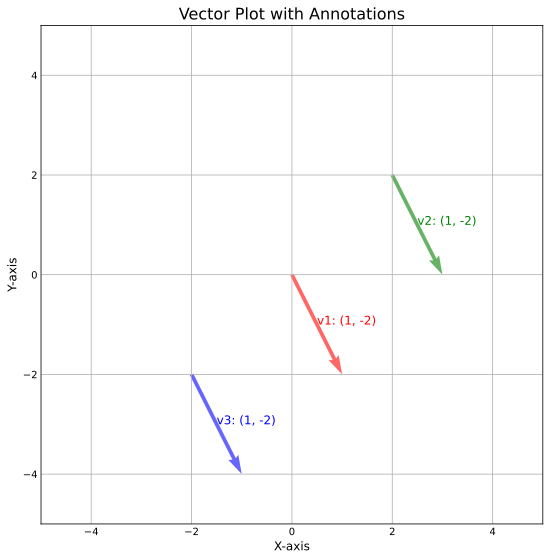

In [2]:
fig, ax = plt.subplots(figsize=(9, 9))
plotter = VectorPlotter2D(
    fig=fig,
    ax=ax,
    ax_kwargs={
        'set_xlim': {'left': -5, 'right': 5},
        'set_ylim': {'bottom': -5, 'top': 5},
        'set_xlabel': {'xlabel': 'X-axis', 'fontsize': 12},
        'set_ylabel': {'ylabel': 'Y-axis', 'fontsize': 12},
        'set_title': {'label': 'Vector Plot with Annotations', 'fontsize': 16},
    }
)

# Define vectors
vector1 = Vector2D(origin=(0, 0), direction=(1, -2), color="r", label="v1")
vector2 = Vector2D(origin=(2, 2), direction=(1, -2), color="g", label="v2")
vector3 = Vector2D(origin=(-2, -2), direction=(1, -2), color="b", label="v3")

# Add vectors and annotations to plotter
for vector in [vector1, vector2, vector3]:
    plotter.add_vector(vector)
    annotation_text = f"{vector.label}: ({vector.direction[0]}, {vector.direction[1]})"
    plotter.add_text(vector.origin[0] + vector.direction[0]/2,
                     vector.origin[1] + vector.direction[1]/2,
                     annotation_text, fontsize=12, color=vector.color)

plotter.plot()
save_path = Path("./assets/01-vector-definition-vector-versus-coordinate.svg")
if not save_path.exists():
    plotter.save(save_path)

```{figure} ./assets/01-vector-definition-vector-versus-coordinate.svg
---
name: 01-vector-definition-vector-versus-coordinate
---

Three of the same vectors with different starting coordinates; By Hongnan G.
```

In [3]:
print(vector1.dimension)
print(vector1.magnitude)
print(vector2.dimension)
print(vector2.magnitude)
print(vector3.dimension)
print(vector3.magnitude)

2
2.23606797749979
2
2.23606797749979
2
2.23606797749979


### Vector is Invariant under Coordinate Transformation

The **_geometric interpretation_** of vectors is crucial, and this aspect
deserves special emphasis. We often state that a **_vector is invariant under
coordinate
transformation_**[^vector-is-invariant-under-coordinate-transformation].

Consider a vector $\mathbf{v}$ in a vector space. Mathematically, this can be
represented as the following:

$$
\mathbf{v} = \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_{D}
\end{bmatrix} \subseteq \mathbb{R}^{D},
$$

where $v_d$ is the $d$th component of the vector. The vector $\mathbf{v}$ is in
an $D$-dimensional space. The important concept to grasp here is that the vector
$\mathbf{v}$ itself is an abstract entity, distinct from how it's represented in
any particular coordinate system.

```{prf:theorem} Vector is Invariant under Coordinate Transformation
:label: 01-vector-definition-is-invariant-under-coordinate-transformation

A given vector, $\mathbf{v}$, remains the same entity, irrespective of the
coordinate system used to describe it. This property is referred to as the
_**invariance of a vector under coordinate transformations**_. In essence, the
vector's intrinsic properties—its direction and magnitude—do not change, even
though its coordinates might vary with different choices of basis.

For example, consider the vector $\mathbf{v}$ in a two-dimensional space. In one
coordinate system, $\mathbf{v}$ might have coordinates $(x, y)$, but in a
rotated coordinate system, its coordinates could appear different, say
$(x', y')$. Despite this change in representation, the vector $\mathbf{v}$
itself has not changed; it still has the same length and points in the same
direction in space.

This is perfectly illustrated in
{numref}`01-vector-definition-vector-versus-coordinate`, where the three vectors
have different coordinates but are equivalent because they have the same
orientation (direction) and length (magnitude). To be more verbose, the vector
$\mathbf{v}_1$ has the tail at the origin, so we say that its basis is the
standard basis. The vector $\mathbf{v}_2$ has the tail at the point $(2, 2)$, so
we say that its basis is the basis with the origin at $(2, 2)$. The vector
$\mathbf{v}_3$ has the tail at the point $(-2, -2)$, so we say that its basis is
the basis with the origin at $(-2, -2)$. Consequently, no matter which origin
the vector is based on, the vector itself is the same because it moves 1 unit to
the right and 2 units down in a two-dimensional space.

The concept of **_basis_** is central to this idea. A basis provides a frame of
reference for describing vectors. Changing the basis is akin to changing the
viewpoint but not the vector itself. At this juncture, delving deeply into the
concept of basis might be overwhelming, but it's helpful to think of a basis as
our point of reference. In our discussions, we are considering the origin as
this reference point.
```

### Algebraic Definition

```{prf:definition} Algebraic Definition of a Vector
:label: 01-vector-definition-algebraic-definition

In the context of linear algebra, a **vector** $\mathbf{v}$ within an
$D$-dimensional space over a field $\mathbb{F}$ is defined as an ordered
$D$-tuple of elements from $\mathbb{F}$. Specifically, if $\mathbb{F}$ is a
field (such as the real numbers $\mathbb{R}$ or the complex numbers
$\mathbb{C}$) and $D$ is a positive integer, then a vector $\mathbf{v}$ with $D$
entries $v_1, v_2, \cdots, v_D$, where each $v_d$ belongs to $\mathbb{F}$, is
termed an _$D$-vector_[^why-D] over $\mathbb{F}$.

Mathematically, $\mathbf{v}$ is represented as:

$$
\mathbf{v} = (v_1, v_2, \cdots, v_D), \text{ where } v_d \in \mathbb{F} \text{ for each } d = 1, 2, \cdots, D
$$

This notation emphasizes that $\mathbf{v}$ is an ordered collection of elements,
where the order of these elements is crucial to the definition of the vector.
The set of all such $D$-vectors over $\mathbb{F}$ is denoted by $\mathbb{F}^D$:

$$
\mathbb{F}^D = \{ (v_1, v_2, \cdots, v_D) \mid v_d \in \mathbb{F} \text{ for each } d = 1, 2, \cdots, D \}
$$

In the context of **vector spaces**, which will be explored in more detail
later, these $D$-vectors form the fundamental elements of the space, adhering to
specific rules of addition and scalar multiplication consistent with the
properties of the field $\mathbb{F}$. This algebraic perspective is essential in
understanding the structure and operations within vector spaces.
```

## Vector Orientation

In the context of linear algebra and its applications, the orientation of
vectors is a fundamental concept, typically categorized into **column vectors**
and **row vectors**.

-   **Column Vector**: A column vector $\mathbf{v}$ in a $D$-dimensional real
    vector space, denoted as $\mathbf{v} \in \mathbb{R}^{D}$, is defined as a
    $D \times 1$ matrix. Each element of this vector is a real number, and the
    vector is represented as:

    $$
    \mathbf{v} = \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_D \end{bmatrix}_{D \times 1}
    $$

    where $v_1, v_2, \ldots, v_D \in \mathbb{R}$. The subscript notation
    $_{D \times 1}$ emphasizes that $\mathbf{v}$ is a matrix with $D$ rows and 1
    column.

-   **Row Vector**: Similarly, a row vector $\mathbf{v}$ in $\mathbb{R}^{D}$ is
    defined as a $1 \times D$ matrix. It is the transpose of a column vector and
    is represented as:

    $$
    \mathbf{v} =
    \begin{bmatrix}
    v_1 & v_2 & \cdots & v_D
    \end{bmatrix}_{1 \times D}
    $$

    with $v_1, v_2, \ldots, v_D \in \mathbb{R}$. The subscript notation
    $_{1 \times D}$ indicates that $\mathbf{v}$ is a matrix with 1 row and $D$
    columns.

It is worth noting that row and column vectors can be viewed as matrices with
special dimensions. This perspective is useful in understanding the
representation of vectors in the context of matrix operations, which will be
explored in more detail later.

```{prf:remark} Standard Representation of Vectors
:label: 01-vector-definition-column-vector-is-the-standard-representation

In most contexts within linear algebra and its applications, the standard
representation of a vector $\mathbf{v}$ is as a column vector. This convention
aligns with the typical matrix multiplication rules where a column vector can be
viewed as a matrix with a single column. Unless explicitly stated otherwise,
vectors are assumed to be column vectors in mathematical discussions and
computations.
```

In [4]:
# array, no orientation
v = np.array([1, 2, 3])
rich.print(f"v: {v}")
rich.print(f"v shape: {v.shape}")

# col. vector, note that the shape is (3, 1), means a 3 by 1 vector
col_v = np.array([[1], [2], [3]])
rich.print(f"col_v: \n{col_v}")
rich.print(f"col_v shape: {col_v.shape}")

# row vector, note that the shape is (1, 3), means a 1 by 3 vector
row_v = np.array([[1, 2, 3]])
rich.print(f"row_v: {row_v}")
rich.print(f"row_v shape: {row_v.shape}")

v: [1 2 3]

v shape: (3,)

col_v: 
[[1]
 [2]
 [3]]

col_v shape: (3, 1)

row_v: [[1 2 3]]

row_v shape: (1, 3)

## Equality of Vectors

```{prf:definition} Equality of Vectors
:label: 01-vector-definition-equality-of-vectors

- **Geometric Perspective**: In the context of the geometric interpretation of
  vectors, two vectors $\mathbf{u}$ and $\mathbf{v}$ are considered **equal** if
  and only if they have identical magnitudes and directions. This definition
  implies that vectors are _free vectors_, meaning their position in space is
  irrelevant to their definition. Consequently, two vectors that appear
  different in terms of their starting points but have the same length and
  direction (orientation) are in fact the same vector geometrically. This is
  illustrated by the example in
  {numref}`01-vector-definition-vector-versus-coordinate`, where three vectors
  may visually appear distinct but are geometrically equivalent.

- **Algebraic Perspective**: From the algebraic viewpoint, consider two vectors
  $\mathbf{v}$ and $\mathbf{w}$ in an $D$-dimensional space over a field
  $\mathbb{F}$, represented as column vectors:

  $$
  \mathbf{v} = \begin{bmatrix} v_{1} \\ v_{2} \\ \vdots \\ v_{D} \end{bmatrix}, \quad
  \mathbf{w} = \begin{bmatrix} w_{1} \\ w_{2} \\ \vdots \\ w_{D} \end{bmatrix}.
  $$

  These vectors are **equal** if and only if each corresponding element of
  $\mathbf{v}$ is equal to the corresponding element of $\mathbf{w}$.
  Mathematically, this is expressed as:

  $$
  v_{d} = w_{d} \quad \text{for all} \quad d \in \{1, 2, \cdots, D\}.
  $$

  This definition emphasizes the ordered nature of vectors in algebraic terms,
  where equality is established component-wise.
```

## Transpose of a Vector

```{prf:definition} Transpose of a Vector
:label: 01-vector-definition-transpose-of-a-vector

We revisit the concept of **transpose** from the perspective of column and row
vectors. The **transpose** of a vector $\mathbf{v}$ is a fundamental operation
that converts a row vector to a column vector and vice versa.

- **Column Vector**: A column vector in $D$-dimensional space, denoted as
  $\mathbf{v} \in \mathbb{R}^D$, is represented as a $D \times 1$ matrix (a
  matrix with $D$ rows and 1 column). It is defined as:

  $$
  \mathbf{v} = \begin{bmatrix} v_{1} \\ v_{2} \\ \vdots \\ v_{D} \end{bmatrix}_{D \times 1}.
  $$

  Here, $v_{d}$ represents the $d$-th element of the vector $\mathbf{v}$, where
  $d \in \{1, 2, \ldots, D\}$.

- **Row Vector**: A row vector is the transpose of a column vector. The
  transpose of vector $\mathbf{v}$, denoted as $\mathbf{v}^T$, is a $1 \times D$
  matrix (a matrix with 1 row and $D$ columns). It is represented as:

  $$
  \mathbf{v}^T = \begin{bmatrix} v_{1} & v_{2} & \cdots & v_{D} \end{bmatrix}_{1 \times D}.
  $$

  The operation of transposition changes the orientation of the vector from
  vertical to horizontal.
```

### Properties of Transpose

```{prf:property} Properties of Transpose
:label: 01-vector-definition-properties-of-transpose

1. **Double Transpose**: The transpose of the transpose of a vector returns the
   original vector, i.e., $\left(\mathbf{v}^T\right)^T = \mathbf{v}$.

2. **Transpose of a Sum**: The transpose of a sum of two vectors is equal to the
   sum of their transposes, i.e.,
   $(\mathbf{u} + \mathbf{v})^T = \mathbf{u}^T + \mathbf{v}^T$ for any vectors
   $\mathbf{u}, \mathbf{v} \in \mathbb{R}^D$.

3. **Transpose of Scalar Multiplication**: The transpose of a scalar multiple of
   a vector is the scalar multiple of the transpose of the vector, i.e.,
   $(c\mathbf{v})^T = c\mathbf{v}^T$ for any scalar $c \in \mathbb{R}$ and any
   and vector $\mathbf{v} \in \mathbb{R}^D$.
```

## References and Further Readings

-   Axler, S. (1997). _Linear Algebra Done Right_. Springer New York. (Chapter
    1.A).

[^vector-is-invariant-under-coordinate-transformation]:
    See
    [What does it mean for a vector to remain invariant under coordinate transformation?](https://www.physicsforums.com/threads/what-does-it-mean-for-a-vector-to-remain-invariant-under-coordinate-transformation.517681/)

[^why-D]:
    The choice of $D$ to represent dimensionality of a vector is chosen on
    purpose where $D$ is a common notation in deep learning to represent the
    dimensionality of a vector space in which the embedding resides.